In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import rayleigh
%matplotlib inline

Сгенерируем выборку объёма 1000 из Распределения Рэлея (с параметром закона Рэлея 𝜎=3).
Здесь 𝜎 - мода, а не среднеквадратичное отклонение.

In [2]:
rl_rv = rayleigh(0,3)
sample = rl_rv.rvs(1000)

Функция распределения (cdf) для полученной выборки

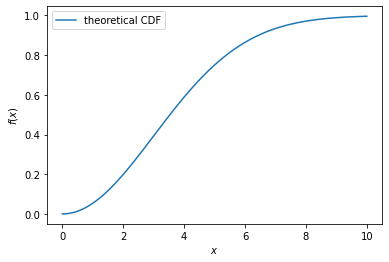

In [3]:
x = np.linspace(0,10,1000)
cdf = rl_rv.cdf(x)

plt.plot(x, cdf, label='theoretical CDF')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки и теоретическая плотность распределения случайной величины

Text(0.5, 0, '$x$')

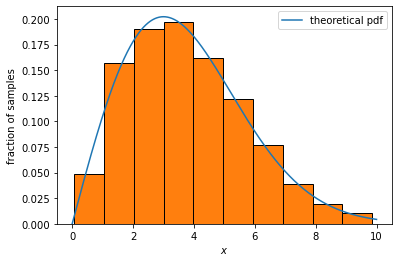

In [4]:
pdf = rl_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1)
plt.legend()

plt.hist(sample, density=True, stacked=True, edgecolor = 'black')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Оценим значения параметров нормальных распределений, которыми 
приближается распределение выборочных средних.

In [5]:
math_ex = 1.253*3
variance = 0.429*9

Оценим распределение выборочного среднего случайной величины при разных объёмах выборок. Для этого сделаем функцию генерации 1000 выборок в зависимости от объема.

In [6]:
def sample_generation(volume):
    sample_for_clt = np.zeros((1000,volume))
    for i in range(1000):
        sample_for_clt[i] = rl_rv.rvs(volume)
    return sample_for_clt

Оценим распределение выборочного среднего случайной величины для выборки с объемом 5:

Text(0.5, 0, '$x$')

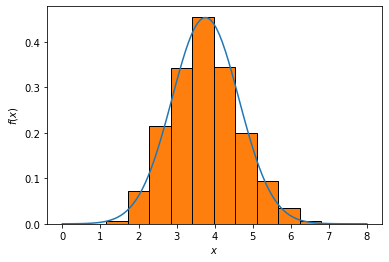

In [7]:
n = 5
new_sample = sample_generation(n)
new_sample_mean = [sum(new_sample[i])/n for i in range(1000)]

norm_rv = sts.norm(math_ex, np.sqrt(variance/n)) #вычисление параметров нормального распределения для n=5
x_new = np.linspace(0,8,100)
pdf_norm = norm_rv.pdf(x_new)
plt.plot(x_new, pdf_norm, alpha=1)

plt.hist(new_sample_mean, bins=10, density=True, edgecolor = 'black')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Оценим распределение выборочного среднего случайной величины для выборки с объемом 10:

Text(0.5, 0, '$x$')

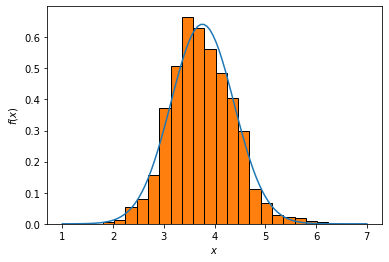

In [8]:
n = 10
new_sample = sample_generation(n)
new_sample_mean = [sum(new_sample[i])/n for i in range(1000)]

norm_rv = sts.norm(math_ex, np.sqrt(variance/n)) #вычисление параметров нормального распределения для n=10
x_new = np.linspace(1,7,100)
pdf_norm = norm_rv.pdf(x_new)
plt.plot(x_new, pdf_norm, alpha=1)

plt.hist(new_sample_mean, bins=20, density=True, edgecolor = 'black')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Оценим распределение выборочного среднего случайной величины для выборки с объемом 50:

Text(0.5, 0, '$x$')

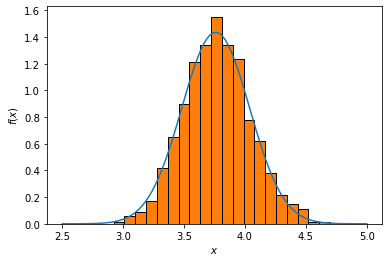

In [20]:
n = 50
new_sample = sample_generation(n)
new_sample_mean = [sum(new_sample[i])/n for i in range(1000)]

norm_rv = sts.norm(math_ex, np.sqrt(variance/n)) #вычисление параметров нормального распределения для n=50
x_new = np.linspace(2.5,5,100)
pdf_norm = norm_rv.pdf(x_new)
plt.plot(x_new, pdf_norm, alpha=1)

plt.hist(new_sample_mean, bins=20, density=True, stacked=True, edgecolor = 'black')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Оценим распределение выборочного среднего случайной величины для выборки с объемом 500:

Text(0.5, 0, '$x$')

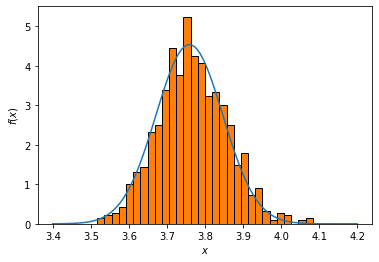

In [19]:
n = 500
new_sample = sample_generation(n)
new_sample_mean = [sum(new_sample[i])/n for i in range(1000)]

norm_rv = sts.norm(math_ex, np.sqrt(variance/n)) #вычисление параметров нормального распределения для n=500
x_new = np.linspace(3.4,4.2,100)
pdf_norm = norm_rv.pdf(x_new)
plt.plot(x_new, pdf_norm, alpha=1)

plt.hist(new_sample_mean, bins=30, edgecolor = 'black', density=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## Выводы:

При увеличении значения n (объема выборки) гистограмма становится более сглаженной и сужается. Точность аппроксимации распределения выборочных средних нормальным с ростом n увеличивается.

Text(0.5, 0, '$x$')

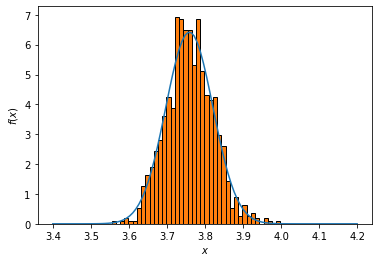

In [17]:
n = 1000
new_sample = sample_generation(n)
new_sample_mean = [sum(new_sample[i])/n for i in range(1000)]

norm_rv = sts.norm(math_ex, np.sqrt(variance/n)) #вычисление параметров нормального распределения для n=500
x_new = np.linspace(3.4,4.2,100)
pdf_norm = norm_rv.pdf(x_new)
plt.plot(x_new, pdf_norm, alpha=1)

plt.hist(new_sample_mean, bins=40, edgecolor = 'black', density=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')